In [22]:
import quimb.tensor as qtn
import tnmpa.solvers.quimb_vbp as qbp
import numpy as np

In [2]:
from tnmpa.models.mis import MIS

In [35]:
alpha = 2.9

# number of variables
N = 100

# numer of clauses
M = int(alpha * N)

In [36]:
mis = MIS(N, M)

In [37]:
tn = mis.hyper_tn()

In [23]:
np.log(tn.contract(output_inds=()))

21.94752819000304

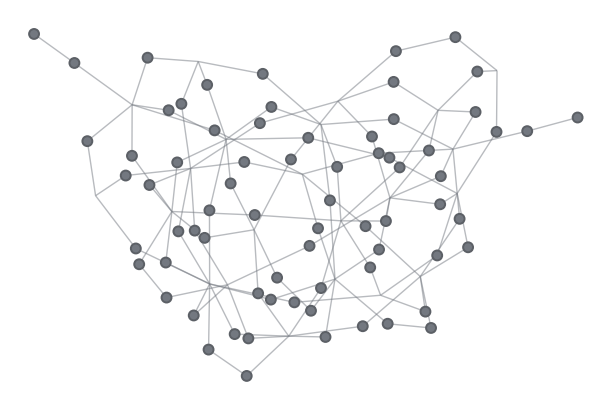

In [7]:
#tn.draw()

In [32]:
messages, converged = qbp.run_belief_propagation(
    tn, 
    tol=1e-13,
    max_iterations=1000, 
    progbar=True,
    # you can parallelize but its not super efficient
    thread_pool=8,
)

0.8611573856264926: 100%|██████████| 1000/1000 [00:02<00:00, 413.30it/s]


In [33]:
qbp.compute_free_entropy_from_messages(tn, messages)

11.264390502358866

In [38]:
config, tnc, omega = qbp.sample_belief_propagation(
    tn, progbar=True, 
    thread_pool=8,
    bias=True,
)

v76->0: 100%|██████████| 99/99 [00:08<00:00, 11.55it/s]
